In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as pyplt
from sklearn.metrics import r2_score, mean_squared_error
# print(f'version {sklearn.__version__}')

dataset = fetch_california_housing()
print(dataset.DESCR)
print(dataset.feature_names)
# print(dataset["data"][:10,:])
# print(dataset["data"][:,0:1])

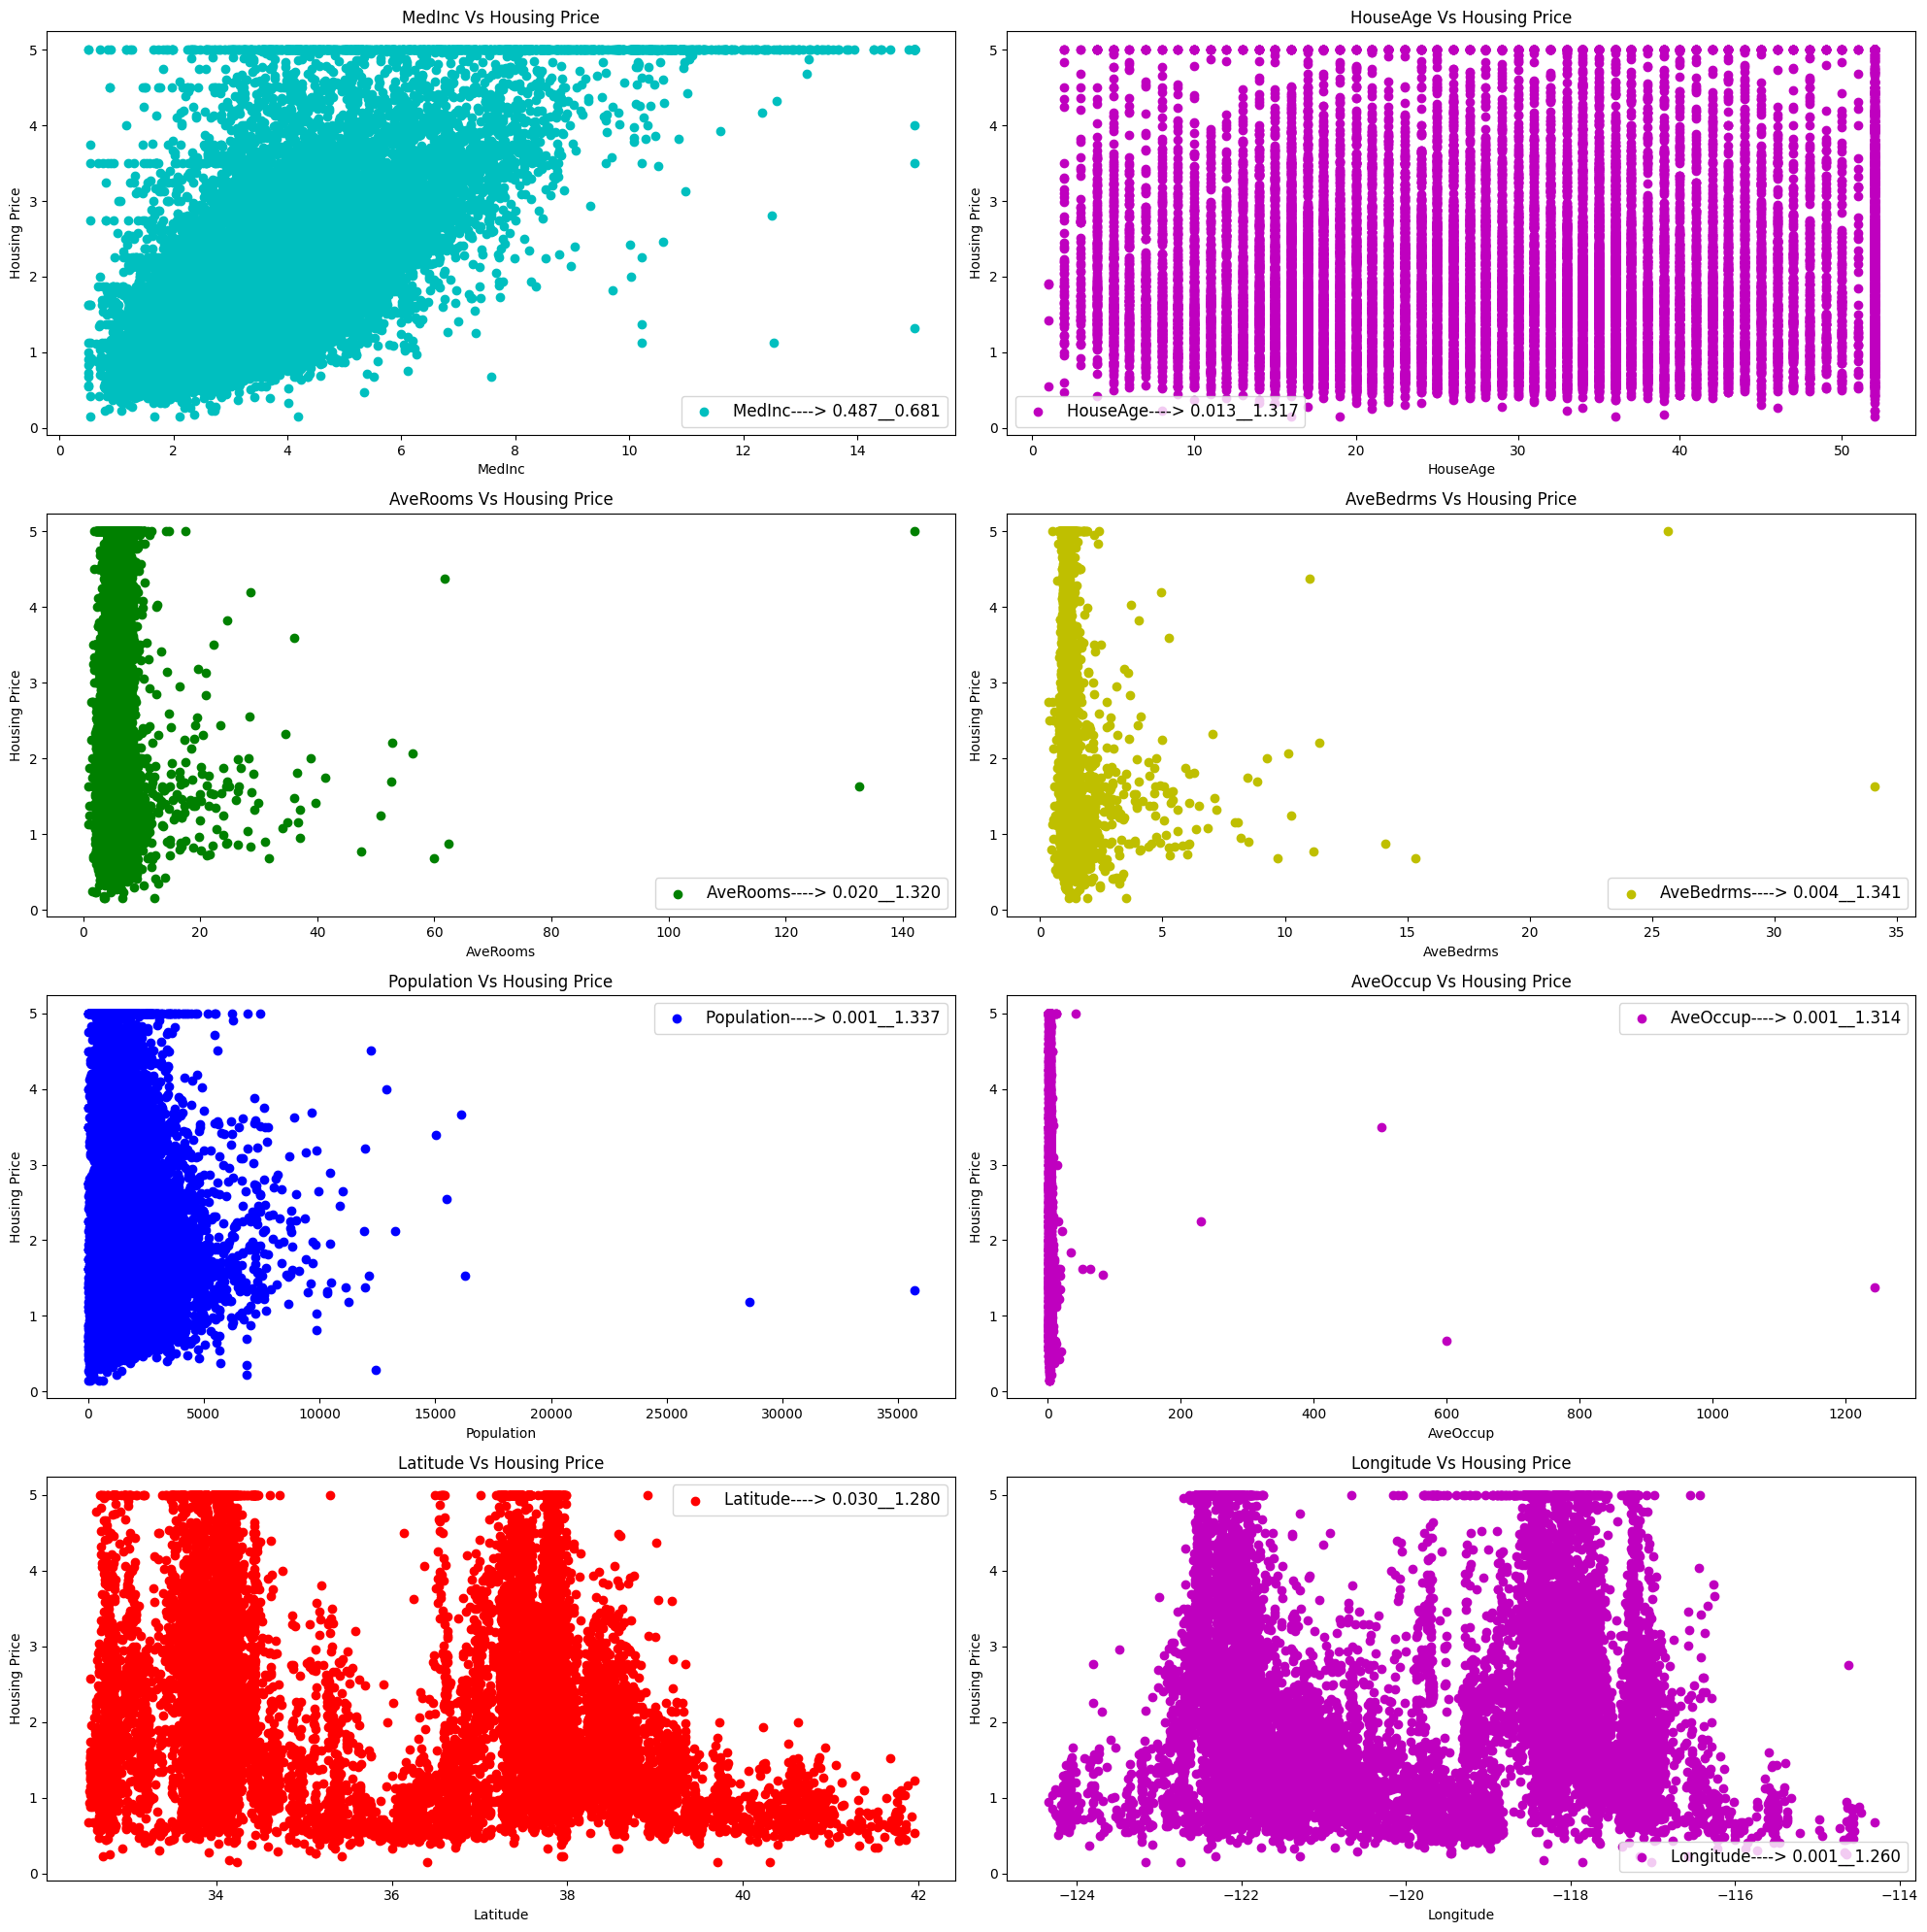

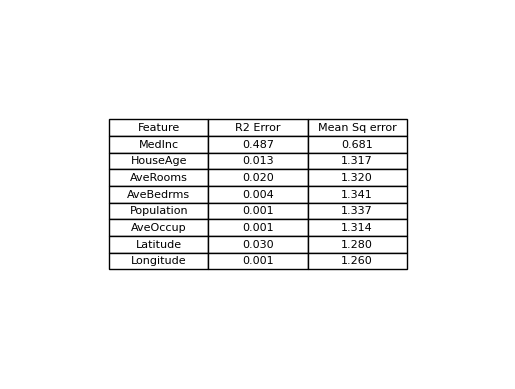

In [51]:
from sklearn.model_selection import train_test_split
import random

# print(dataset["data"][:5,:])
colors = ['r', 'g', 'b', 'c', 'm', 'y']
error_data =  [['Feature', 'R2 Error', 'Mean Sq error']]

def setup_matplot():
    fig, axs = pyplt.subplots(nrows=4, ncols=2, figsize=(20, 20))
    return axs

def create_scatter_plot(x, y, x_test,y_pred,ax,xlabel,ylabel,r2_mean_err):
    # pyplt.figure()
    ax.scatter(x,y,c=colors[random.randint(0, 5)],label=r2_mean_err)
    # pyplt.plot(x_test,y_pred,color="red")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f'{xlabel} Vs {ylabel}')
    ax.legend(fontsize="large")

def show_all_plots():
    pyplt.tight_layout()
    pyplt.show()

def evaluate_feature(featureName,x,y,ax,isPlotNeeded):
  x_train, x_test, y_train, y_test =   train_test_split(x, y, test_size=0.20)
  model = LinearRegression()
  model.fit(x_train,y_train)
   # predict based on minimization of squared err
  y_pred = model.predict(x_test)

  # quantitative evaluation
  r2_sc = "{:.3f}".format(r2_score(y_test,y_pred))
  mean_err = "{:.3f}".format(mean_squared_error(y_test,y_pred))
  # print(f'{featureName}----> {r2_sc}__{mean_err}')
  r2_mean_err = f'{featureName}----> {r2_sc}__{mean_err}'
  error_data.append([featureName,r2_sc,mean_err])
  if (isPlotNeeded):
    create_scatter_plot(x,y,x_test,y_pred,ax,featureName, "Housing Price",r2_mean_err)

def plot_table_for_err():
  fig, ax = pyplt.subplots()
  table = ax.table(cellText=error_data, loc='center', cellLoc='center', colWidths=[0.2] * 3)
  ax.axis('off')
  pyplt.show()


# evaulate features individually
features = dataset.feature_names
axs = setup_matplot()
i = 0
for fname in features:
  x = dataset["data"][:,i:i+1]
  y = dataset["target"]
  ax = axs[i//2 ][i % 2]
  evaluate_feature(fname,x,y,ax,True)
  i+=1

show_all_plots()

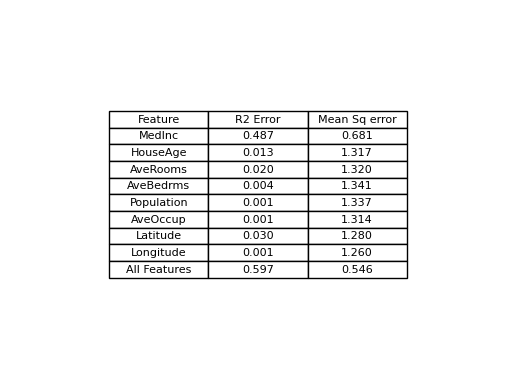

In [52]:
# prints R2 score and Mean sqaured error for all features
evaluate_feature("All Features",dataset["data"],dataset["target"],'',False)
plot_table_for_err()